In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('testdata.csv')

In [3]:
df

,통계표,한국은행 기준금리(%),한국은행 어조분석,"GDP(계절조정, 명목, 분기, 단위:10억원)","기대인플레이션율(전국, 월,%)",변동
0,Jun-05,3.25,0.717953,237019.1,3.5,0
1,Jul-05,3.25,0.782059,241872.5,3.3,0
2,Aug-05,3.25,0.796570,241872.5,3.2,0
3,Sep-05,3.25,0.742429,241872.5,2.9,0
4,Oct-05,3.50,0.847037,245316.7,3.1,1
...,...,...,...,...,...,...
197,Nov-21,1.00,0.780960,530268.9,2.7,1
198,Dec-21,1.00,0.692374,530268.9,2.6,0
199,Jan-22,1.25,0.802538,532765.7,2.6,1
200,Feb-22,1.25,0.732685,532765.7,2.7,0


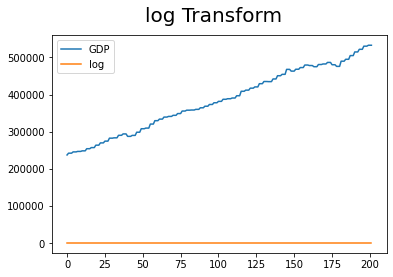

In [ ]:
y = np.log(df['GDP(계절조정, 명목, 분기, 단위:10억원)'])
plt.plot( df['GDP(계절조정, 명목, 분기, 단위:10억원)'],label='GDP')
plt.plot(y, label='log')
plt.suptitle('log Transform',size= 20)
plt.legend()
plt.show()

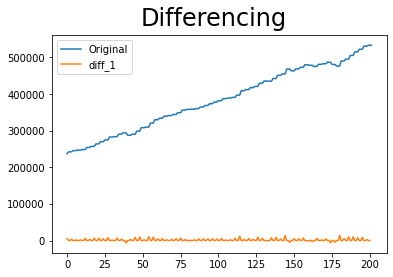

In [ ]:

df = pd.read_csv('testdata.csv')['GDP(계절조정, 명목, 분기, 단위:10억원)']
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)
diff_1 = difference(df)

plt.plot(df, label="Original")
plt.plot(diff_1, label="diff_1")
plt.suptitle("Differencing", size=24)
plt.legend()
plt.show()

## 금리 자체 분석

In [ ]:
# 'GDP(계절조정, 명목, 분기, 단위:10억원)'
#df['기대인플레이션율(전국, 월,%)']
#df['통계표']
#df['한국은행 기준금리(%)']
#df['한국은행 어조분석']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn import svm

In [ ]:
df = pd.read_csv('testdata.csv')
df = pd.DataFrame(df)
df.describe()

,한국은행 기준금리(%),한국은행 어조분석,"GDP(계절조정, 명목, 분기, 단위:10억원)","기대인플레이션율(전국, 월,%)",변동
count,202.000000,202.000000,202.000000,202.000000,202.000000
mean,2.375000,0.637151,383744.078713,2.915842,0.004950
std,1.284051,0.106524,85888.925202,0.696149,0.417259
min,0.500000,0.453971,237019.100000,1.600000,-1.000000
25%,1.500000,0.550653,307751.300000,2.500000,0.000000
50%,2.000000,0.622890,381521.300000,2.800000,0.000000
75%,3.250000,0.723428,467985.375000,3.200000,0.000000
max,5.250000,0.868208,532765.700000,4.600000,1.000000


In [ ]:
##df_x = np.diff(np.log(df[['GDP(계절조정, 명목, 분기, 단위:10억원)','기대인플레이션율(전국, 월,%)','한국은행 어조분석']]))
#df_y = df['한국은행 기준금리(%)']
#X_train,X_test,y_train,y_test = train_test_split(df_x,df_y ,test_size=0.20, random_state=20)
#df['GDP(계절조정, 명목, 분기, 단위:10억원)'] = np.diff(np.log(df['GDP(계절조정, 명목, 분기, 단위:10억원)']))

In [ ]:
#df['GDP(계절조정, 명목, 분기, 단위:10억원)'] = np.insert(np.log(np.diff(df['GDP(계절조정, 명목, 분기, 단위:10억원)'])),0,0)
#df['GDP(계절조정, 명목, 분기, 단위:10억원)'].shape

In [ ]:
df_x = df[['GDP(계절조정, 명목, 분기, 단위:10억원)','기대인플레이션율(전국, 월,%)','한국은행 어조분석']]
df_y = df['한국은행 기준금리(%)']
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y ,test_size=0.20, random_state=20)

In [ ]:
df_x

,"GDP(계절조정, 명목, 분기, 단위:10억원)","기대인플레이션율(전국, 월,%)",한국은행 어조분석
0,237019.1,3.5,0.717953
1,241872.5,3.3,0.782059
2,241872.5,3.2,0.796570
3,241872.5,2.9,0.742429
4,245316.7,3.1,0.847037
...,...,...,...
197,530268.9,2.7,0.780960
198,530268.9,2.6,0.692374
199,532765.7,2.6,0.802538
200,532765.7,2.7,0.732685


In [ ]:
# 소수점 반올림이 맞을까? 아니야 나는 100 곱하는게 더 맞겠어 
#y_train = y_train.apply(lambda x : round(x)) # 추가 부분
#y_test = y_test.apply(lambda x : round(x))


In [ ]:
#100곱해서 계산
y_train = y_train.apply(lambda x : x*100) # 추가 부분
y_test = y_test.apply(lambda x : x*100)

In [ ]:
# lilear 선형 모형을 해당 해용의 추리가 불가능 합니다.  
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_predict = lin_reg.predict(X_test)


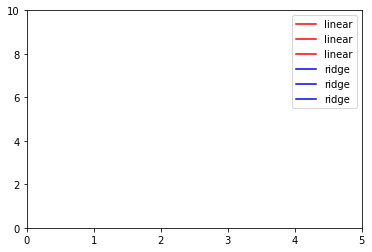

In [ ]:
# lasso ridges 안해도될듯
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_predict_ridge = ridge_reg.predict(X_test)

plt.plot(X_test, y_predict, "r-", label="linear")
#plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X_test, y_predict_ridge, "b-", label="ridge")
plt.plot(X_train, y_train, "y.")
plt.axis([0, 5, 0, 10])
plt.legend()
plt.show()


In [ ]:
# 이걸로 해서는 예츨 불가 입니다.
# 규제 파라미터 및 반복학습 횟수 
logistic_regression= LogisticRegression(C=20,max_iter=5000)
logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)
#accuracy
print("어조분석 통한 금리 예측, logistic acuracy:", np.round(metrics.accuracy_score(y_test,y_pred),3))


어조분석 통한 금리 예측, logistic acuracy: 0.122


In [ ]:
# 연속적 데이터이지 때문에 범주형을 사용해 예측하게 되었습니다. 
dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train, y_train) 
pred = dt_clf.predict(X_test) 

# 어조 분석 있을떄 
print('어조분석 있을 때 금리예측 : DecisionTreeClassifier ')
print('accuracy: ', np.round(accuracy_score(y_test, pred),3))
print("precision:", np.round(metrics.precision_score(y_test,y_pred=pred,average='macro'),3))
print("recall" , np.round(metrics.recall_score(y_test,y_pred=pred,average='macro'),3))
print("f1_score : " , np.round(metrics.f1_score(y_test,y_pred=pred,average='macro'),3))

#print('y축단위 : 0.01%')
#print(metrics.classification_report(y_test, y_pred=pred))

어조분석 있을 때 금리예측 : DecisionTreeClassifier 
accuracy:  0.878
precision: 0.895
recall 0.859
f1_score :  0.874


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#SVM
cls = svm.SVC(kernel="linear") # rbf, poly 등 바꿀 수 있음

#train the model
cls.fit(X_train,y_train)
#predict the response
pred = cls.predict(X_test)
print('어조분석 있을 때 금리예측 : SVM ')
print("precision:", np.round(metrics.precision_score(y_test,y_pred=pred,average='macro'),3))


어조분석 있을 때 금리예측 : SVM 
precision: 0.203


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 어조분석 없을떄 

In [ ]:
# 어조 분석 없을떄 
df_x = df[['GDP(계절조정, 명목, 분기, 단위:10억원)','기대인플레이션율(전국, 월,%)']]
df_y = df['한국은행 기준금리(%)']
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y ,test_size=0.2, random_state=20)


In [ ]:
df_x

,"GDP(계절조정, 명목, 분기, 단위:10억원)","기대인플레이션율(전국, 월,%)"
0,237019.1,3.5
1,241872.5,3.3
2,241872.5,3.2
3,241872.5,2.9
4,245316.7,3.1
...,...,...
197,530268.9,2.7
198,530268.9,2.6
199,532765.7,2.6
200,532765.7,2.7


In [ ]:
#100곱해서 계산
y_train = y_train.apply(lambda x : x*100) # 추가 부분
y_test = y_test.apply(lambda x : x*100)

In [ ]:
# 소수점 반올림이 맞을까? 아니야 나는 100 곱하는게 더 맞겠어 
#y_train = y_train.apply(lambda x : round(x)) # 추가 부분
#y_test = y_test.apply(lambda x : round(x))


In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
#accuracy
print('어조분석 없을 때 금리예측 : logistic_regression ')
print("acuracy:", np.round(metrics.accuracy_score(y_test,y_pred),3))

어조분석 없을 때 금리예측 : logistic_regression 
acuracy: 0.122


In [ ]:
dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train, y_train) 
pred = dt_clf.predict(X_test) 

#어조 분석 없을 때
print('어조분석 없을 때 금리예측 : DecisionTreeClassifier ')
print('accuracy: ', np.round(accuracy_score(y_test, pred),3))
print("precision:", np.round(metrics.precision_score(y_test,y_pred=pred,average='macro'),3))
print("recall" , np.round(metrics.recall_score(y_test,y_pred=pred,average='macro'),3))
print("f1_score : " , np.round(metrics.f1_score(y_test,y_pred=pred,average='macro'),3))
#print('y축단위 : 0.01%')
#print(metrics.classification_report(y_test, y_pred=pred))

어조분석 없을 때 금리예측 : DecisionTreeClassifier 
accuracy:  0.951
precision: 0.949
recall 0.965
f1_score :  0.947


In [ ]:
#SVM
cls = svm.SVC(kernel="linear") # rbf, poly 등 바꿀 수 있음
#train the model
cls.fit(X_train,y_train)
#predict the response
pred = cls.predict(X_test)

print('어조분석 없을 때 금리예측 : SVM ')
print("precision : ", np.round(metrics.precision_score(y_test,y_pred=pred,average='macro'),3))


어조분석 없을 때 금리예측 : SVM 
precision :  0.396


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 금리 변동 예측 분석 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn import svm

## 어조분석 포함시

In [6]:
df = pd.DataFrame(df)

In [8]:
df_x = df[['GDP(계절조정, 명목, 분기, 단위:10억원)','기대인플레이션율(전국, 월,%)','한국은행 어조분석']]
df_y = df['변동']
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y ,test_size=0.01, random_state=0)

In [ ]:
df_x

,"GDP(계절조정, 명목, 분기, 단위:10억원)","기대인플레이션율(전국, 월,%)",한국은행 어조분석
0,237019.1,3.5,0.717953
1,241872.5,3.3,0.782059
2,241872.5,3.2,0.796570
3,241872.5,2.9,0.742429
4,245316.7,3.1,0.847037
...,...,...,...
197,530268.9,2.7,0.780960
198,530268.9,2.6,0.692374
199,532765.7,2.6,0.802538
200,532765.7,2.7,0.732685


In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print('어조분석 있을 때 금리 변동 예측 : logistic_regression ')
print("acuracy:", np.round(metrics.accuracy_score(y_test,y_pred),3))

어조분석 있을 때 금리 변동 예측 : logistic_regression 
acuracy: 0.854


In [ ]:
dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train, y_train) 
pred = dt_clf.predict(X_test) 

print('어조분석 있을 때 금리 변동 예측 : DecisionTreeClassifier ')
#print('accuracy: ', np.round(accuracy_score(y_test, pred),3))  
print("precision:", np.round(metrics.precision_score(y_test,y_pred=pred,average='micro'),3))
#print("recall" , np.round(metrics.recall_score(y_test,y_pred=pred,average='micro'),3))
#print(metrics.classification_report(y_test, y_pred=pred))

어조분석 있을 때 금리 변동 예측 : DecisionTreeClassifier 
precision: 0.756


In [ ]:
#SVM
cls = svm.SVC(kernel="linear") # rbf, poly 등 바꿀 수 있음
#cls = svm.SVC(kernel="rbf")
#cls = svm.SVC(kernel="linear")
#train the model
cls.fit(X_train,y_train)
pred = cls.predict(X_test)
print('어조분석 있을 때 금리 변동 예측 : SVM ')
print("precision:", np.round(metrics.precision_score(y_test,y_pred=pred,average='micro'),3))

어조분석 있을 때 금리 변동 예측 : SVM 
precision: 0.805


## 어조분석 포함 안할떄 

In [ ]:
df = pd.read_csv('testdata.csv')
df = pd.DataFrame(df)

In [ ]:
df_x = df[['GDP(계절조정, 명목, 분기, 단위:10억원)','기대인플레이션율(전국, 월,%)']]
df_y = df['변동']
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y ,test_size=0.15, random_state=20)

In [ ]:
df_x

,"GDP(계절조정, 명목, 분기, 단위:10억원)","기대인플레이션율(전국, 월,%)"
0,237019.1,3.5
1,241872.5,3.3
2,241872.5,3.2
3,241872.5,2.9
4,245316.7,3.1
...,...,...
197,530268.9,2.7
198,530268.9,2.6
199,532765.7,2.6
200,532765.7,2.7


In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print('어조분석 없을 때 금리 변동 예측 : LogisticRegression ')
print("acuracy:", np.round(metrics.accuracy_score(y_test,y_pred),3))

어조분석 없을 때 금리 변동 예측 : LogisticRegression 
acuracy: 0.854


In [ ]:
dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train, y_train) 
pred = dt_clf.predict(X_test) 

print('어조분석 없을 때 금리 변동 예측 : DecisionTreeClassifier ')
print('accuracy: ', np.round(accuracy_score(y_test, pred),3))  
print("acuracy:", np.round(metrics.accuracy_score(y_test,y_pred=pred),3))
print("precision:", np.round(metrics.precision_score(y_test,y_pred=pred,average='micro'),3))
print("recall" , np.round(metrics.recall_score(y_test,y_pred=pred,average='micro'),3))
#print(metrics.classification_report(y_test, y_pred=pred))

어조분석 없을 때 금리 변동 예측 : DecisionTreeClassifier 
accuracy:  0.683
acuracy: 0.683
precision: 0.683
recall 0.683


In [ ]:
#SVM
cls = svm.SVC(kernel="linear") # rbf, poly 등 바꿀 수 있음
#train the model
cls.fit(X_train,y_train)
pred = cls.predict(X_test)
print('어조분석 없을 때 금리 변동 예측 : SVM ')
print("precision:", np.round(metrics.precision_score(y_test,y_pred=pred,average='micro'),3))

어조분석 없을 때 금리 변동 예측 : SVM 
precision: 0.839


In [ ]:

#df_x = df[['GDP(계절조정, 명목, 분기, 단위:10억원)','기대인플레이션율(전국, 월,%)','한국은행 어조분석']]
#df_y = df['한국은행 기준금리(%)']
#X_train,X_test,y_train,y_test = train_test_split(df_x,df_y ,test_size=0.20, random_state=20)

In [ ]:
#df['GDP(계절조정, 명목, 분기, 단위:10억원)'] = np.diff(np.log(df['GDP(계절조정, 명목, 분기, 단위:10억원)']))


##XGBoost

In [9]:
df_x = df[['GDP(계절조정, 명목, 분기, 단위:10억원)','기대인플레이션율(전국, 월,%)','한국은행 어조분석']]
df_y = df['한국은행 기준금리(%)']
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y ,test_size=0.01, random_state=0)
y_train = y_train.apply(lambda x : x*100) # 추가 부분
y_test = y_test.apply(lambda x : x*100)

In [ ]:
df_x = df[['GDP(계절조정, 명목, 분기, 단위:10억원)','기대인플레이션율(전국, 월,%)']]
df_y = df['한국은행 기준금리(%)']
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y ,test_size=0.20, random_state=0)
y_train = y_train.apply(lambda x : x*100) # 추가 부분
y_test = y_test.apply(lambda x : x*100)

In [10]:
from xgboost import XGBClassifier

# 모델 선언 예시
model = XGBClassifier(n_estimators=5000, learning_rate=0.2, max_depth=19, random_state = 20)

n_estimators : 학습 모델의 수, 많아질수록 성능 향상의 가능성이 있으나, 속도가 느려짐

learning_rate : 학습률, 너무 크면 gradient 발산의 가능성이 있으며, 너무 작으면 학습이 느림

max_depth : 최대 탐색 깊이, 너무 크면 과적합의 가능성, 너무 작으면 학습 성능 저하

min_samples_split : 분할 종료 최소 샘플 수, 큰 수면 과적합을 막지만 학습 성능 저하 가능성

min_samples_leaf : leaf node가 되기 위한 최소 샘플 수, min_samples_split과 비슷한 용도

random_state : 특정 숫자로 고정 시에 실행 시마다 고정된 결과 반환

In [11]:
model.fit(X_train, y_train)

XGBClassifier(learning_rate=0.2, max_depth=19, n_estimators=5000,
              objective='multi:softprob', random_state=20)

In [12]:
pred = model.predict(X_test)
print('어조분석 있을 때 금리 예측 : XGBoost ')
print("precision:", np.round(metrics.precision_score(y_test,y_pred=pred,average='micro'),3))

어조분석 있을 때 금리 예측 : XGBoost 
precision: 0.667


In [16]:
y_test

18     450.0
171    150.0
107    250.0
Name: 한국은행 기준금리(%), dtype: float64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_x,df_y ,test_size=0.20, random_state=0)
y_train = y_train.apply(lambda x : x*100) # 추가 부분
y_test = y_test.apply(lambda x : x*100)

model = XGBClassifier(n_estimators=5000, learning_rate=0.2, max_depth=19, random_state = 20)

model.fit(X_train, y_train)

pred = model.predict(X_test)
print('어조분석 있을 때 금리 예측 : XGBoost ')
print("precision:", np.round(metrics.precision_score(y_test,y_pred=pred,average='micro'),3))


어조분석 있을 때 금리 예측 : XGBoost 
precision: 0.78


In [5]:
from xgboost import XGBClassifier